# Kütüphaneler
---

In [1]:
import geopandas as gpd
from pathlib import Path

from glob import glob

import earthpy.plot as ep
import rasterio as rio

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Veri Okuma
---

In [2]:
np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("sat_data/*.tiff")
S_sentinel_bands.sort()


# Bant Görselleştirme
---

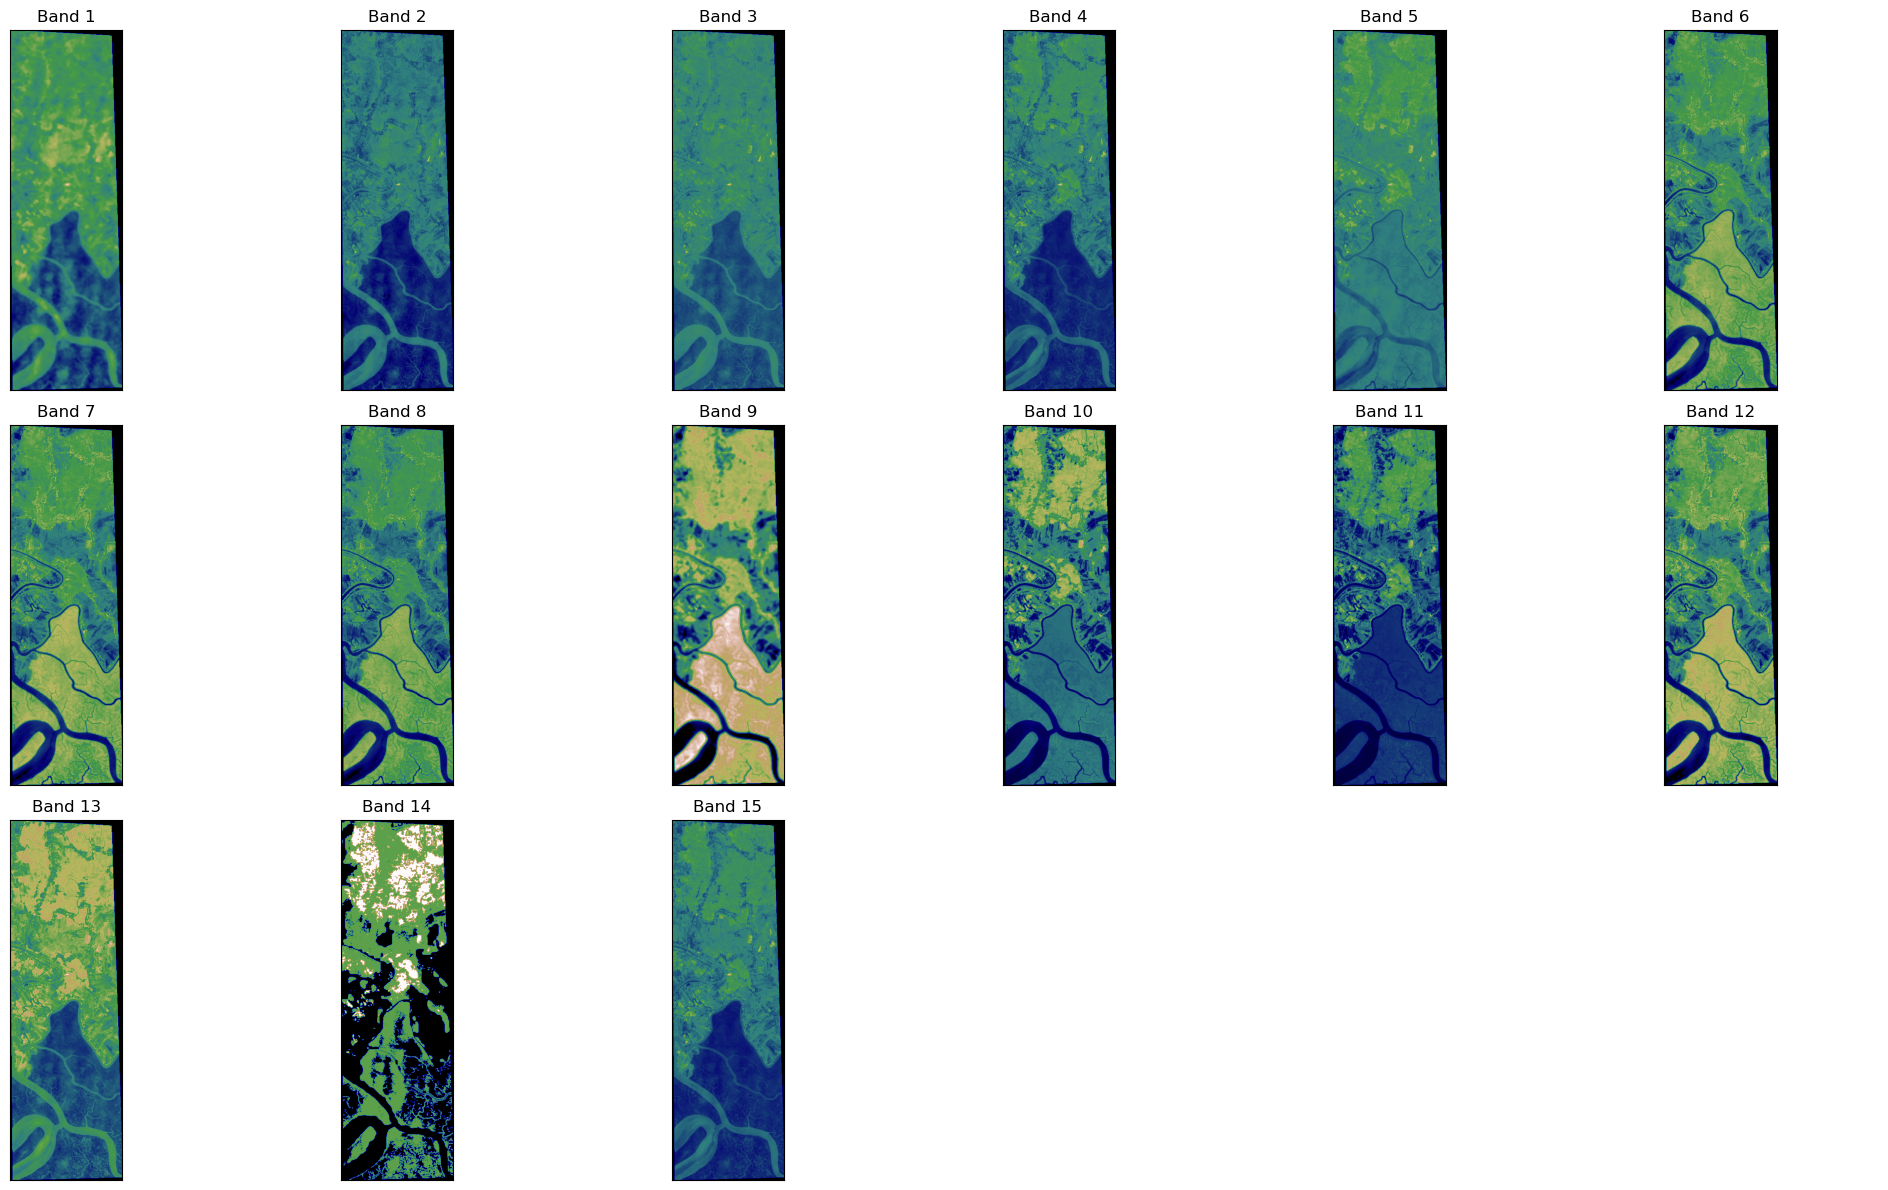

In [3]:
l = []
for i in S_sentinel_bands:
	with rio.open(i, 'r') as f:
		l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()


# Histogramlar
---

Histogramlar, görüntünün her bir bandındaki piksel değerlerinin dağılımını gösterir. Her bir renk bandı için ayrı bir histogram çizilir.

Histogramlar, piksel değerlerinin frekansını görselleştirir. Bu, her bir renk bandındaki piksellerin hangi aralıklarda yoğunlaştığını, hangi değerlere daha sık rastlandığını anlamak için kullanılır. Histogramlar, görüntüdeki kontrastı, parlaklık ayarlarını ve genel piksel dağılımını değerlendirmek için önemli bir araçtır.
<br></br>

Bantlar, görünür ışık, kızılötesi ışık ve radar gibi farklı elektromanyetik dalga boylarını temsil eder.

* Histogramın ilk üç bandı (Band 1-2-3): Görünür ışığı temsil eder. 
  * Bu bantlar, görüntünün rengini ve parlaklığını belirler. 
  * 1.bant, kırmızı ışığı temsil eder ve en yüksek değere sahiptir. Bu, görüntünün kırmızımsı bir renk tonuna sahip olduğunu gösterir. 
  * 2.bant, yeşil ışığı temsil eder.
  * 3.bant ise mavi ışığı temsil eder. 
  * İkinci ve üçüncü bant görüntünün parlaklığını belirler.
<br></br>

* Histogramın sonraki altı bandı (Band 4-5-6-7-8-9): Kızılötesi ışığı temsil eder. 
  * Bu bantlar, görüntünün sıcaklığını ve nemi belirler. 
  * 4-5-6. kızılötesi bant, kısa dalga boylu kızılötesi ışığı temsil eder. Bu bantlar, görüntünün sıcaklığını belirler. 
  * 7-8-9. kızılötesi bantlar, uzun dalga boylu kızılötesi ışığı temsil eder. Bu bantlar, görüntünün nemini belirler.
<br></br>

* Histogramın son altı bandı (Band 10-11-12-13-14-15): Radar ışığı temsil eder. 
  * Bu bantlar, görüntünün yansıma özelliklerini belirler. 
  * 10-11-12. radar bandı, yatay yansımayı temsil eder. Bu bantlar, görüntünün yüzeyinin ne kadar düz olduğunu belirler. 
  * 13-14-15. radar bandı, dikey yansımayı temsil eder. Bu bantlar, görüntünün yüzeyinin ne kadar pürüzlü olduğunu belirler.



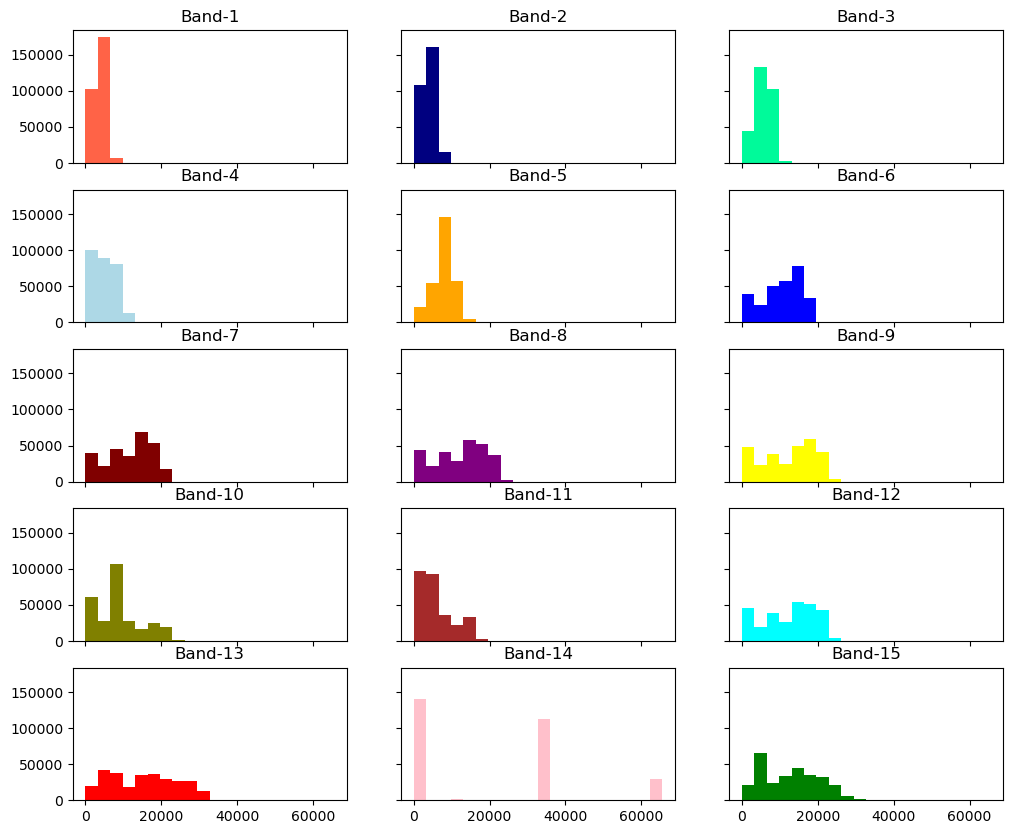

In [4]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
		  'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan', 'red', 'pink', 'green']
ep.hist(arr_st,
		colors = colors,
		title=[f'Band-{i}' for i in range(1, 16)],
		cols=3,
		alpha=1,
		figsize = (12, 10)
		)

plt.show()


# Uydu Görüntüsünün Haritadaki Konumunu Belirleme
---

### Pixel Koordinatlarını Coğrafi Koordinatlarına Dönüştürme

In [5]:
def pixel_to_coords(src, pixel_x, pixel_y):
	transform = src.transform
	lon, lat = transform * (pixel_x, pixel_y)
	return lon, lat


### Harita ve Koordinat Görselleştirme

In [6]:
def visualize_on_world_map(gdf, world, title):
	ax = world.plot(figsize=(20, 10), color='white', edgecolor='grey')
	gdf.plot(ax=ax, marker='o', markersize=70, color='red')
	ax.set_title(title)
	plt.show()


### Haritalaştırılacak Dosya Listesi

In [7]:
map_file_paths = [
	'sat_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color.tiff',
	'sat_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_True_color.tiff'
]


### Dünya Haritasını Ekleme

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/mc/c5jhp1y51bg5v9jd__t3xwjm0000gn/T/ipykernel_60663/601121909.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Her Dosyayı Ayrı Haritalarda Görselleştirme

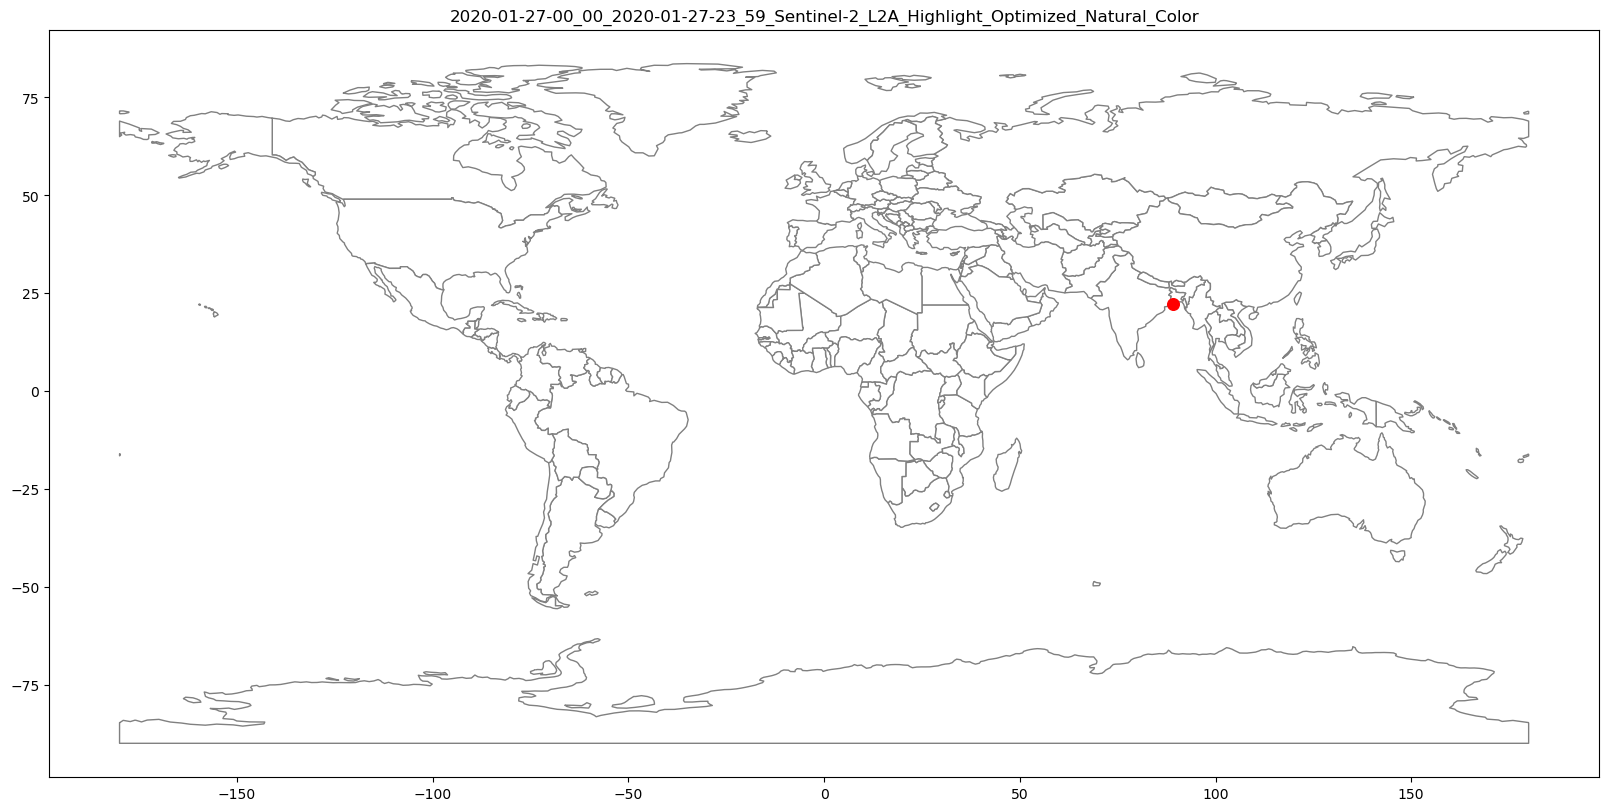

2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color Görüntüsündeki Orta Noktanın Coğrafi Koordinatları:
Longitude (Boylam): 89.10667419433594
Latitude (Enlem): 22.21354970342964




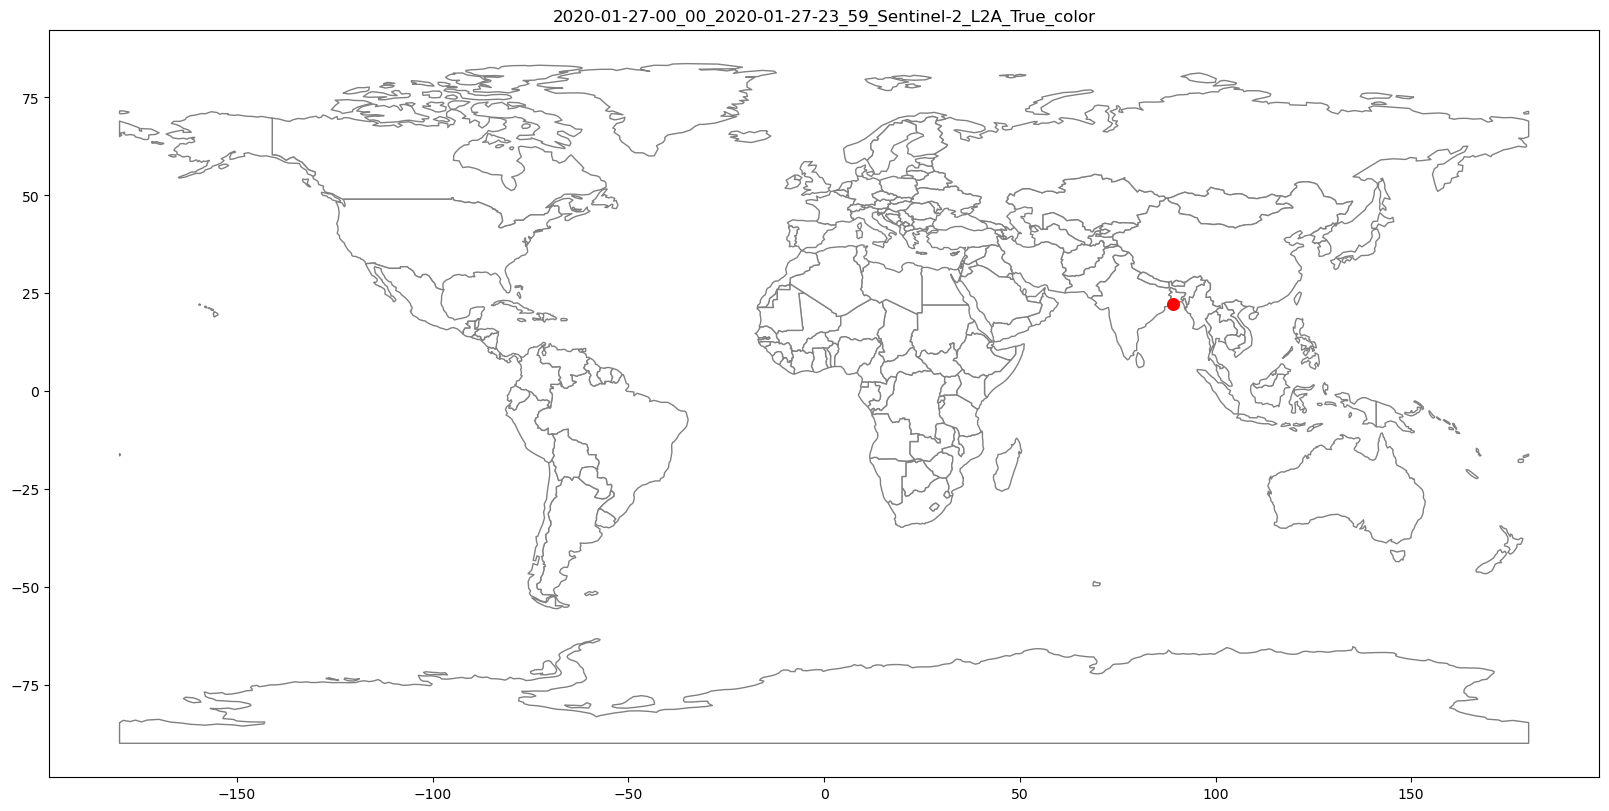

2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_True_color Görüntüsündeki Orta Noktanın Coğrafi Koordinatları:
Longitude (Boylam): 89.10667419433594
Latitude (Enlem): 22.21354970342964




In [9]:
for map_file_paths in map_file_paths:
	with rio.open(map_file_paths) as src:
		# Görüntünün genişlik ve yüksekliğini al
		width = src.width
		height = src.height

		# Görüntünün ortasındaki piksel koordinatlarını belirle
		pixel_x = width // 2
		pixel_y = height // 2

		# Pikselleri coğrafi koordinatlara dönüştürme
		lon, lat = pixel_to_coords(src, pixel_x, pixel_y)

		# GeoDataFrame oluştur
		gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([lon], [lat]))

		# Dosya adından başlık oluştur
		title = Path(map_file_paths).stem

		# Görselleştirmeyi yap
		visualize_on_world_map(gdf, world, title)

		print(f"{title} Görüntüsündeki Orta Noktanın Coğrafi Koordinatları:")
		print(f"Longitude (Boylam): {lon}")
		print(f"Latitude (Enlem): {lat}")
		print("\n")


# Bant Bilgileri
---

Yakın Kızılötesi (NIR) band ve Kırmızı (Red) band, uydu görüntülerinde yaygın olarak kullanılan iki farklı elektromanyetik dalga bandını temsil eder. Bu bantlar, farklı dalga boylarındaki ışık yansımalarını ölçerler ve genellikle bitki örtüsü, toprak özellikleri ve diğer çeşitli yüzey özellikleri hakkında bilgi sağlamak için kullanılırlar.

* Yakın Kızılötesi (NIR) Band: Bitki sağlığını ve fotosentezi değerlendirmek için kullanılır. Bitki örtüsü tarafından yansıtılan ve klorofil tarafından emilen ışığı ölçer. Canlı bitkiler tarafından yansıtılan bu bant, bitkilerin büyüme durumu, stres düzeyi ve fotosentetik aktivitesi hakkında bilgi sağlar.

* Kırmızı (Red) Band: Bitki örtüsünün genel sağlığını değerlendirmek için kullanılır. Bitki klorofil tarafından emilen ve bitki örtüsü tarafından yansıtılan ışığı ölçer. Kırmızı bant, bitki örtüsünün fotosentetik aktivitesi, bitki türleri ve bitki örtüsünün yoğunluğu hakkında bilgi sağlar.

NDVI analizi gerçekleştirilirken kullanılan band türlerine dikkat edilmesi gerekmektedir. Her uydu türünde band sıralaması farklı olabilmektedir. NDVI analizinde kullanılan NIR ve RED bandları da farklı uydu türlerinde farklı band sıralarında yer alabilmektedir.

Örneğin;

* Landsat 7 uydusunda:
  *  RED bandı band 3’te
  *  NIR bandı band 4’te
* Landsat 8 uydusunda:
  * RED bandı band 4’te
  * NIR bandı band 5’te
* Sentinel-2 uydusunda:
  * RED bandı band 4’te
  * NIR bandı band 8’de yer almaktadır.

# NDVI (Normalize Edilmiş Fark Bitki Örtüsü İndeksi)
---

Tanım: Herhangi bir alanda yer alan bitki örtüsünün yoğunluğunu, sağlıklı veya sağlıksız olma durumunu analiz ederek ortaya koyan bir indekstir.

Amaç: Matematiksel işlem kombinasyonları veya spektral bant dönüşümleri kullanarak yeşil bitki örtüsünü daha ön plana çıkartarak diğer görüntü nesnelerinden daha ön plana çıkartılması amaçlanmıştır.

Değer Aralığı: Sağlıklı ve yoğun bitki örtüsünün fazla olduğu yerlerde indeks değerleri +1’e doğru yaklaşırken, sağlıksız ve zayıf bitki örtüsünün fazla olduğu yerlerde ise indeks değeri -1’e doğru yaklaşmaktadır.



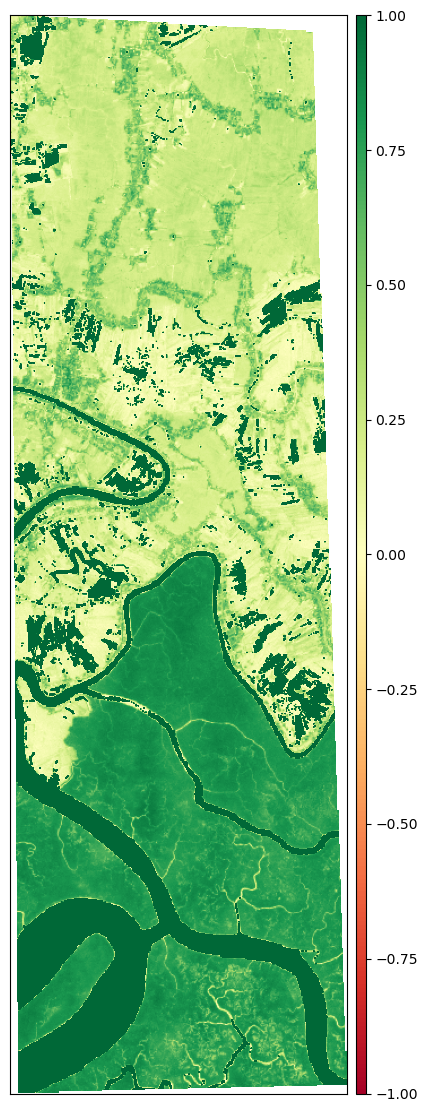

In [10]:
def calculate_ndvi(nir_band, red_band):
	"""
	Normalleştirilmiş fark formülünü kullanarak NDVI'yı hesaplar

	Parametreler:
	- nir_band: numpy dizisi, Yakın Kızılötesi bant değerleri
	- red_band: numpy dizisi, Kırmızı bant değerleri

	Return:
	- ndvi: numpy dizisi, Hesaplanan NDVI değerleri
	"""
	ndvi = (nir_band - red_band) / (nir_band + red_band)
	return ndvi

def plot_ndvi(ndvi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(10, 14)):
	"""
	NDVI değerlerini çizer

	Parametreler:
	- ndvi: numpy dizisi, NDVI değerleri
	- cmap: str, çizim için renk haritası (varsayılan: "RdYlGn")
	- vmin: float, renk haritası için minimum değer (varsayılan: -1)
	- vmax: float, renk haritası için maksimum değer (varsayılan: 1)
	- figsize: tuple, çizim şeklinin boyutu (varsayılan: (10, 14))
	"""
	ep.plot_bands(ndvi, cmap=cmap, cols=1, vmin=vmin, vmax=vmax, figsize=figsize)
	plt.show()

# Bant atamaları
nir_band = arr_st[7]
red_band = arr_st[3]

# NDVI hesapla
ndvi_values = calculate_ndvi(nir_band, red_band)

# NDVI'yi görselleştir
plot_ndvi(ndvi_values)


# 



# Sıcaklık İndeksi Analizi
---

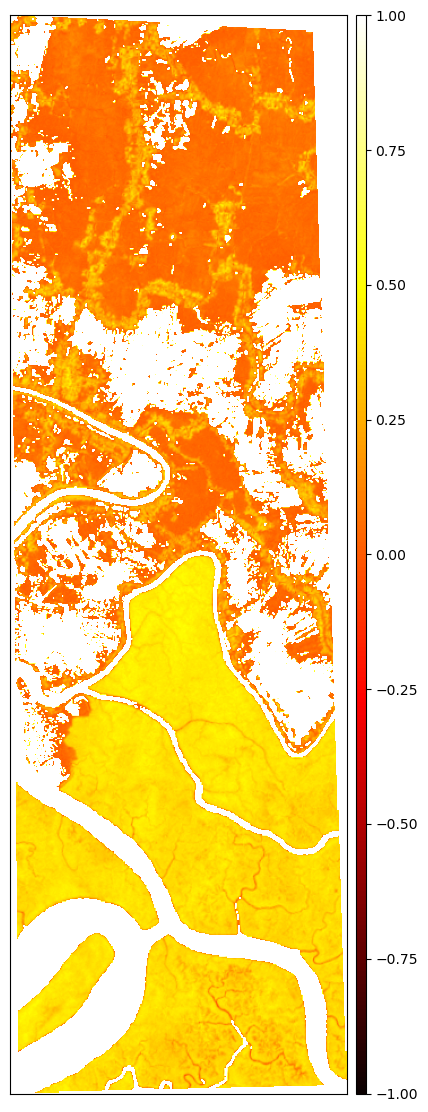

In [11]:
def calculate_and_visualize_temperature_index(band5, band6):
	"""
	Termal bantlarla sıcaklık indeksini hesaplar ve görselleştirir

	Parametreler:
	- band5: numpy dizisi, Kızılötesi (IR) bant
	- band6: numpy dizisi, Termal Infrared (TIR) bant
	"""

	# Sıcaklık indeksini hesaplar (NDVI gibi hesaplaması)
	temperature_index = (band6 - band5) / (band6 + band5)

	# Sıcaklık indeksini görselleştirir
	ep.plot_bands(temperature_index, cmap="hot", vmin=-1, vmax=1, figsize=(10, 14))

ir_band = arr_st[4]
tir_band = arr_st[5]

calculate_and_visualize_temperature_index(ir_band, tir_band)


# Nem İndeksi Analizi
---

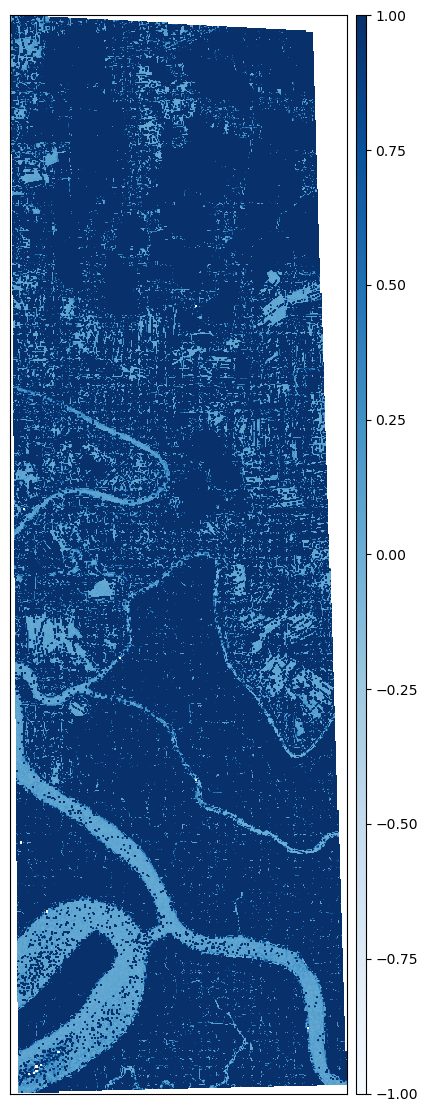

In [12]:
import numpy as np
import earthpy.plot as ep
import matplotlib.pyplot as plt

def calculate_and_visualize_moisture_index(band7, band8, band9):
	"""
	7, 8 ve 9. bantlarla nem indeksini hesaplar ve görselleştirir.

	Parametreler:
	- band7: numpy dizisi, SWIR (Kısa Dalga Kızılötesi) bant
	- band8: numpy dizisi, NIR (Kızılötesi) bant
	- band9: numpy dizisi, SWIR (Kısa Dalga Kızılötesi) bant
	"""

	# Nem indeksini hesaplar
	moisture_index = (band7 - band8) / (band7 + band8 - band9)

	# Nem indeksini görselleştirir
	ep.plot_bands(moisture_index, cmap="Blues", vmin=-1, vmax=1, figsize=(10, 14))
	plt.show()

swir_band = arr_st[6]
nir_band = arr_st[7]
swir_band_2 = arr_st[8]

calculate_and_visualize_moisture_index(swir_band, nir_band, swir_band_2)


# Pürüzlü Yüzey Tespiti
---

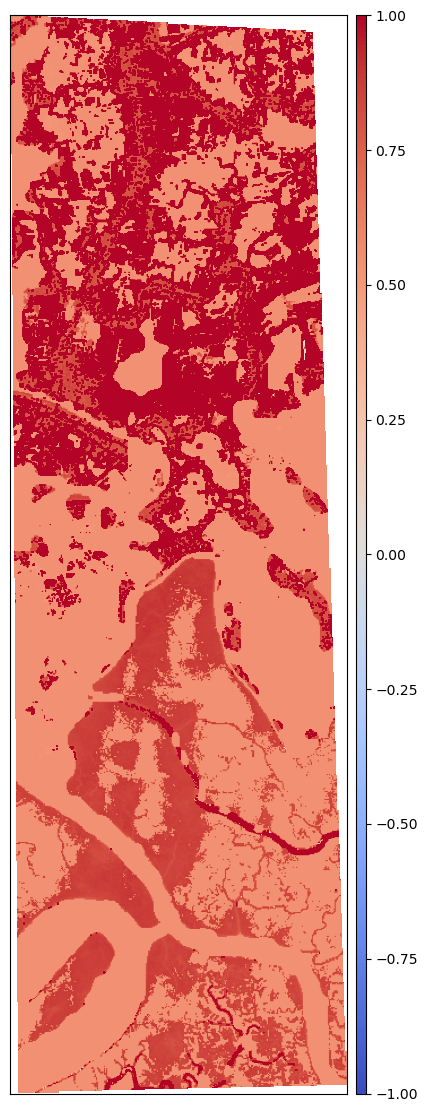

In [13]:
def calculate_and_visualize_roughness_index(band13, band14, band15):
	"""
	13., 14. ve 15. bantlarla pürüzlülük indeksini hesaplar ve görselleştirir.

	Parametreler:
	- band13: numpy dizisi, 13. bant
	- band14: numpy dizisi, 14. bant
	- band15: numpy dizisi, 15. bant
	"""

	# Pürüzlülük indeksini hesaplar
	roughness_index = (band13 - band14) / (band13 + band14 + band15)

	# Pürüzlülük indeksini görselleştirir
	ep.plot_bands(roughness_index, cmap='coolwarm', vmin=-1, vmax=1, figsize=(10, 14))

band13 = arr_st[12]
band14 = arr_st[13]
band15 = arr_st[14]

calculate_and_visualize_roughness_index(band13, band14, band15)
